<a href="https://colab.research.google.com/github/BhagyaSri-1806/DataAnalyst/blob/main/MINIPROJECT(12_05_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
data = pd.read_csv('/content/dataset.csv')


#**Task 01: Reading the Dataset**



In [4]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,04-01-2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,04-01-2015 01:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,04-01-2015 02:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,04-01-2015 03:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,04-01-2015 04:00,47,2.0,0.0,93.0,6.5,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
17409,03-01-2017 19:00,1042,5.0,1.0,81.0,19.0,3,0,0,3
17410,03-01-2017 20:00,541,5.0,1.0,81.0,21.0,4,0,0,3
17411,03-01-2017 21:00,337,5.5,1.5,78.5,24.0,4,0,0,3
17412,03-01-2017 22:00,224,5.5,1.5,76.0,23.0,4,0,0,3


# **TASK 02 - CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT**

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Missing Values:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64
Duplicate Rows: 0


#**TASK 03 - PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE**



<ipython-input-6-b5647b9be532>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")
<ipython-input-6-b5647b9be532>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")
<ipython-input-6-b5647b9be532>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="viridis")
<ipython-input-6-b5647b9be532>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

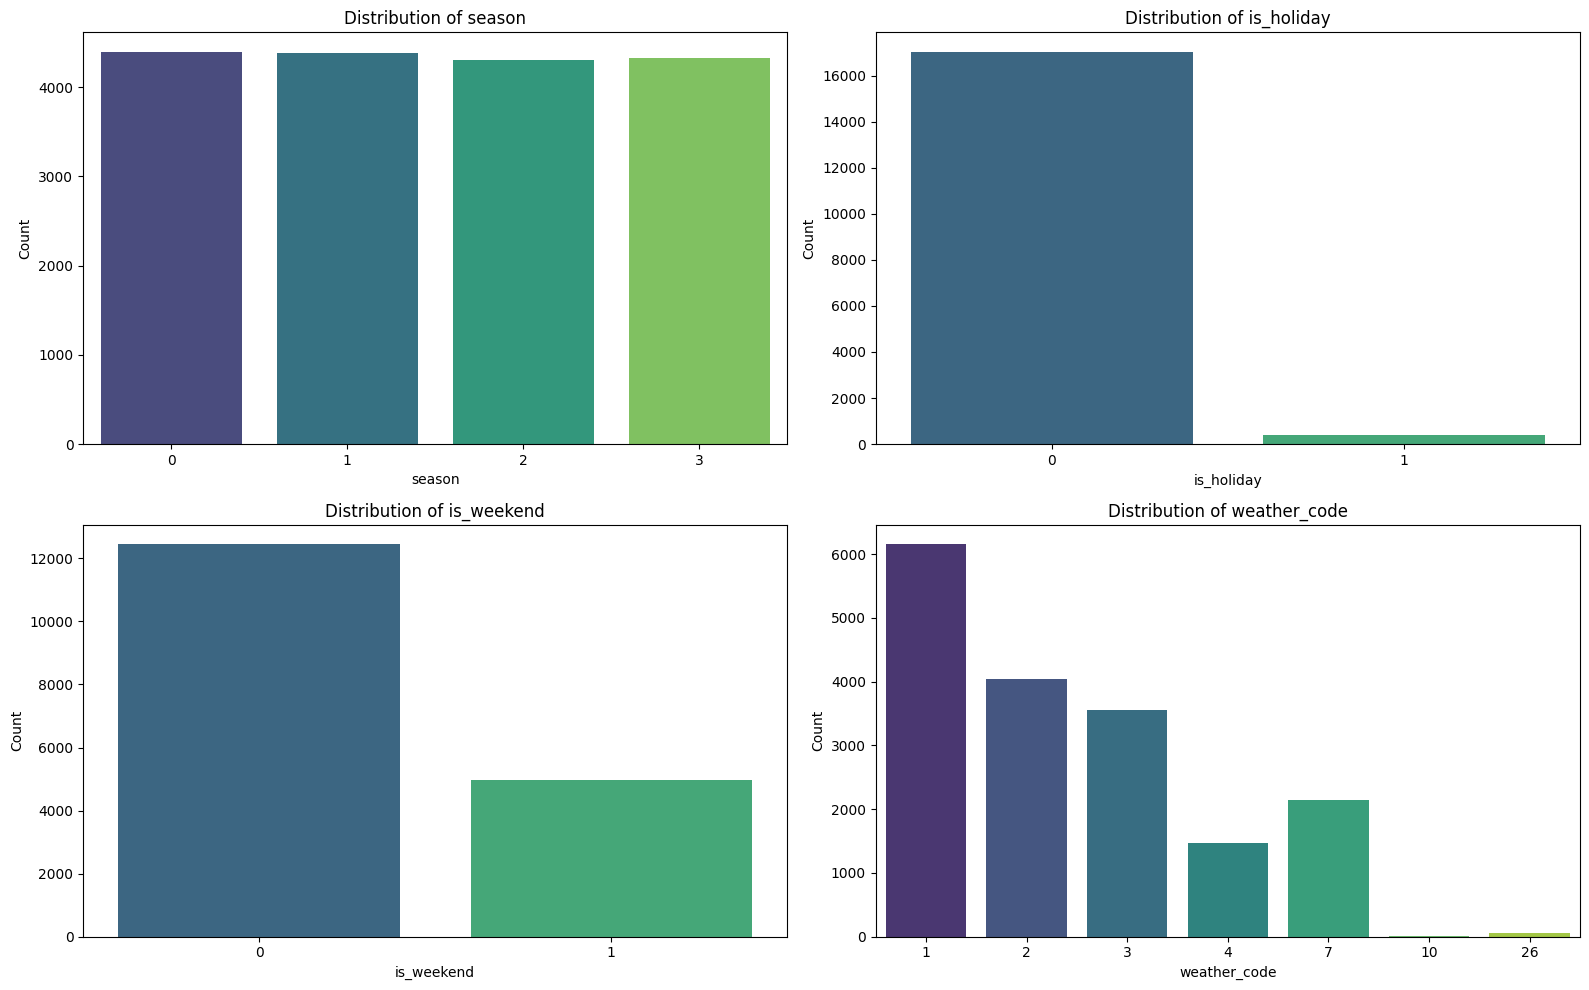

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of discrete features
discrete_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']

# Plot the distributions
plt.figure(figsize=(16, 10))
for i, feature in enumerate(discrete_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=feature, palette="viridis")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


# **TASK 04 - LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX**

In [7]:
# Convert 'timestamp' to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d-%m-%Y %H:%M') # Specify the correct format
data.set_index('timestamp', inplace=True)

# Confirm the changes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  int64  
 6   is_holiday    17414 non-null  int64  
 7   is_weekend    17414 non-null  int64  
 8   season        17414 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.3 MB
None


# **TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.**



In [8]:
# Extract new features
data['year'] = data.index.year
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek
data['day_of_month'] = data.index.day
data['hour'] = data.index.hour

# Display the updated dataset
print(data.head())


                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0             3   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0             1   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0             1   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0             1   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5             1   

                     is_holiday  is_weekend  season  year  month  day_of_week  \
timestamp                                                                       
2015-01-04 00:00:00           0           1       3  2015      1            6   
2015-01-04 01:00:00           0           1       3  2015      1            6   
2015-01-04 02:00:00           0           1       3  2015      1            6   
2015-01-04 03:00:00           0           1       3  2015      1            6   
2015-01-04 04:00

# **TASK 06 - VISUALIZING THE CORRELATION WITH A HEATMAP**

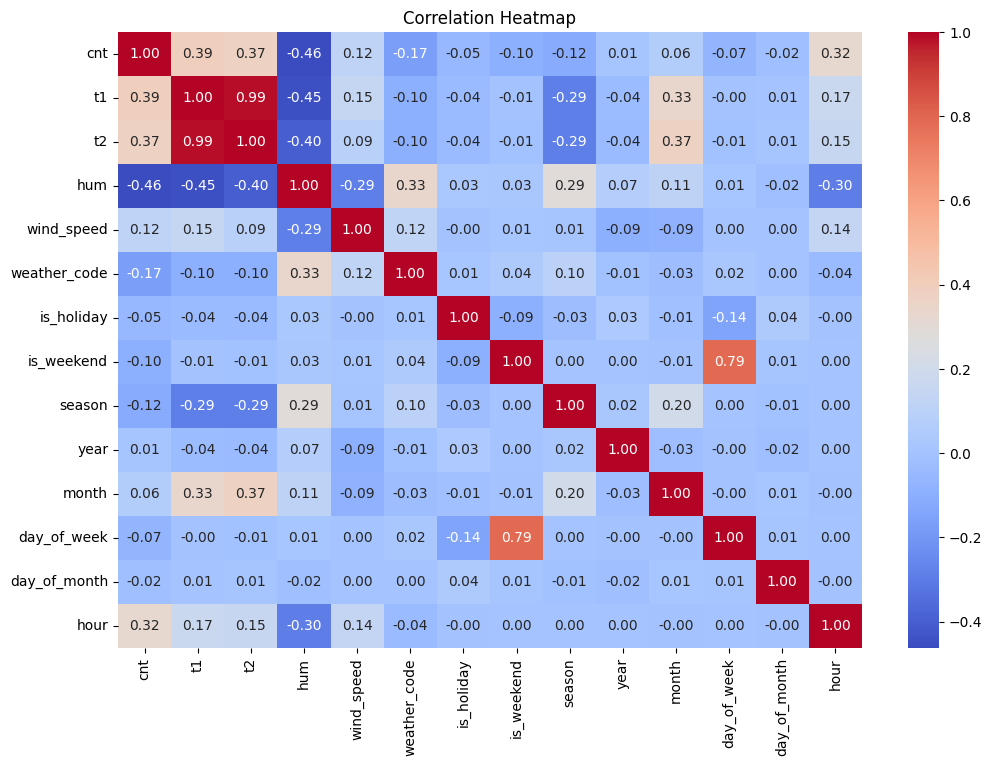

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **TASK 07 - VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLOt**



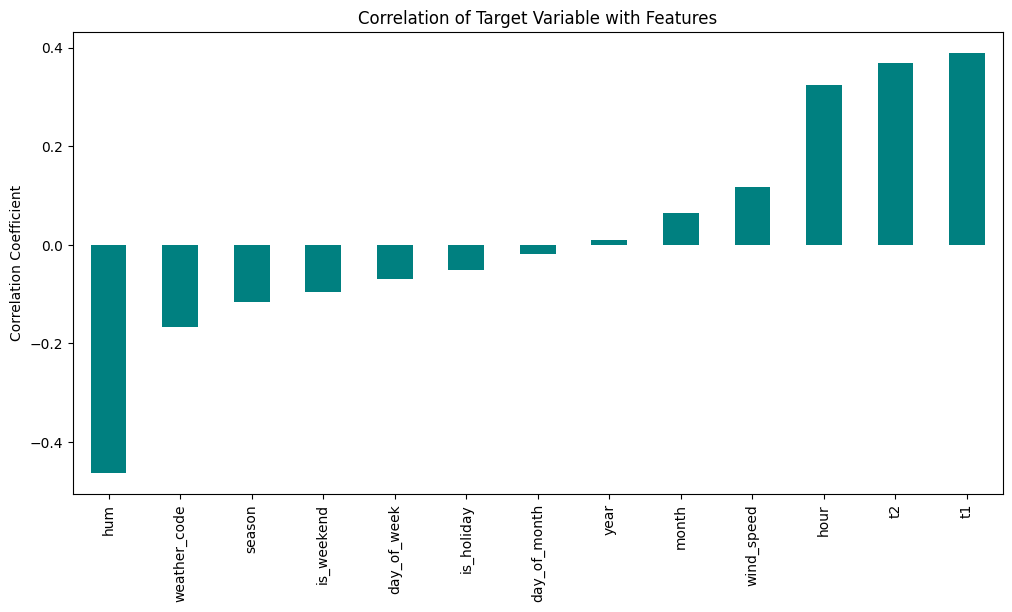

In [10]:
correlations = data.corr()['cnt'].drop('cnt')
correlations.sort_values().plot(kind='bar', figsize=(12, 6), color='teal')
plt.title("Correlation of Target Variable with Features")
plt.ylabel("Correlation Coefficient")
plt.show()


# **TASK 08 - PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT**

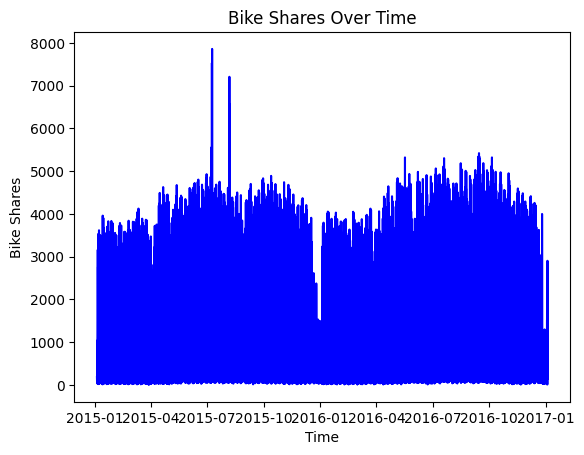

In [11]:
sns.lineplot(data=data, x=data.index, y='cnt', color='blue')
plt.title("Bike Shares Over Time")
plt.xlabel("Time")
plt.ylabel("Bike Shares")
plt.show()


# **TASK 09 - PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)**

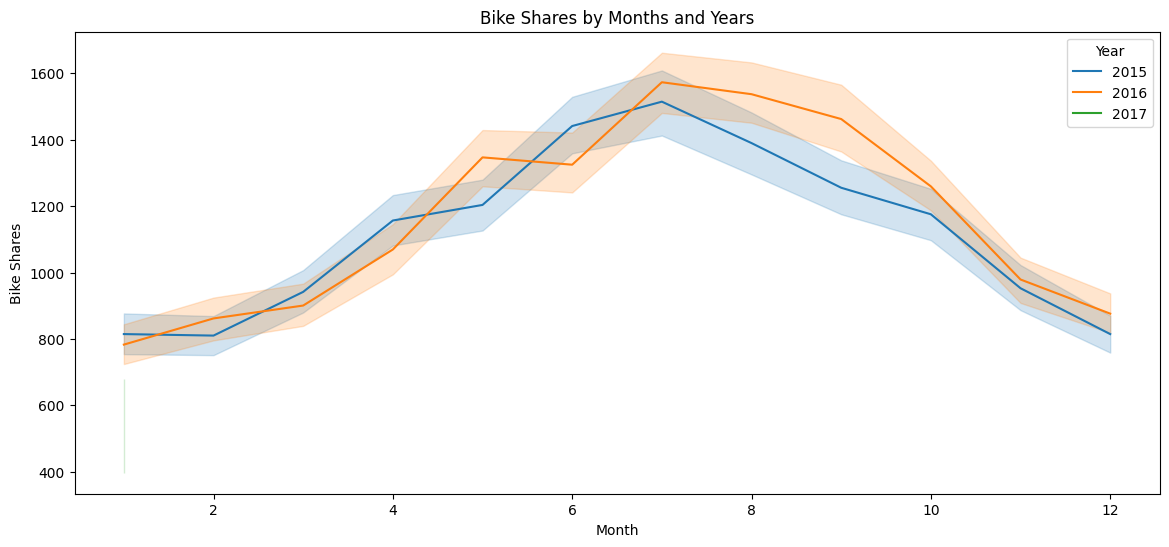

In [12]:
plt.figure(figsize=(14, 6))

# Monthly trend
sns.lineplot(data=data, x='month', y='cnt', hue='year', palette='tab10')
plt.title("Bike Shares by Months and Years")
plt.xlabel("Month")
plt.ylabel("Bike Shares")
plt.legend(title='Year')
plt.show()


# **TASK 10 - PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)**

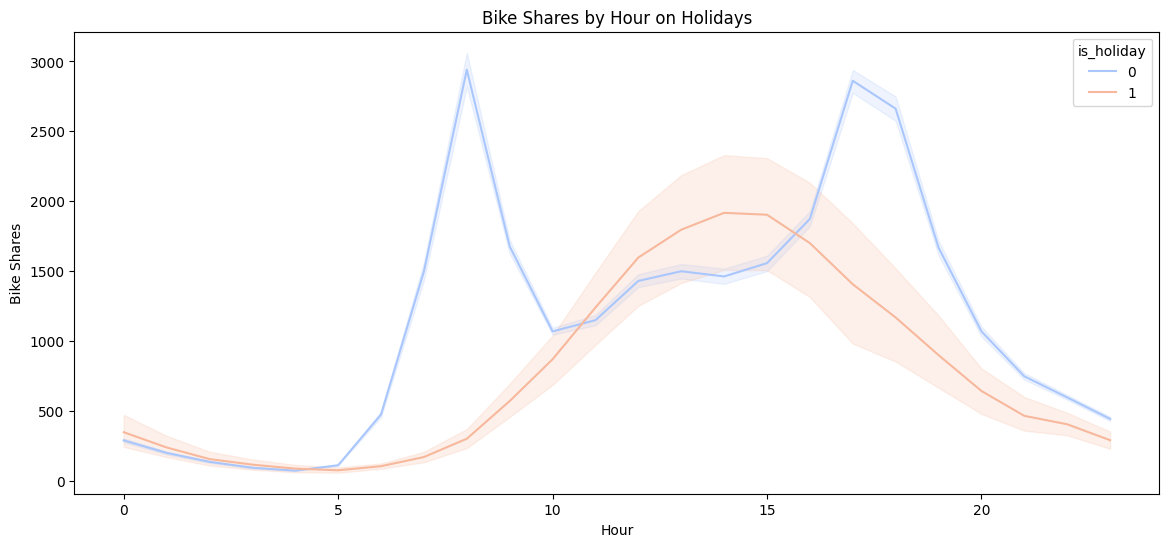

In [13]:
plt.figure(figsize=(14, 6))

# Group by hour and is_holiday
sns.lineplot(data=data, x='hour', y='cnt', hue='is_holiday', palette='coolwarm')
plt.title("Bike Shares by Hour on Holidays")
plt.xlabel("Hour")
plt.ylabel("Bike Shares")
plt.show()


# **TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK**

<ipython-input-14-6c9592751f24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='day_of_week', y='cnt', palette='muted')


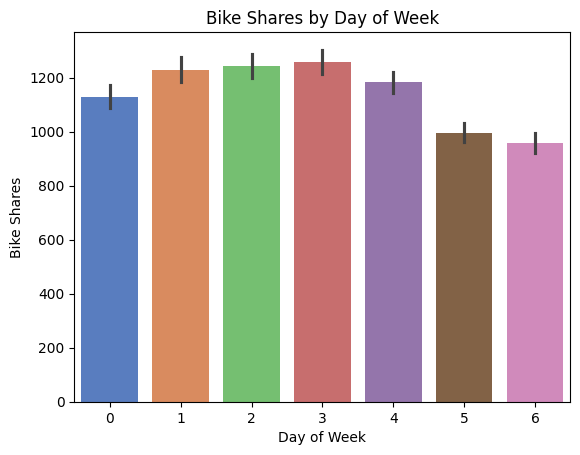

In [14]:
sns.barplot(data=data, x='day_of_week', y='cnt', palette='muted')
plt.title("Bike Shares by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Bike Shares")
plt.show()


# **TASK 12 - PLOTTING BIKE SHARES BY DAY OF MONTH**

<ipython-input-15-cd9af434944f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='day_of_month', y='cnt', palette='viridis')


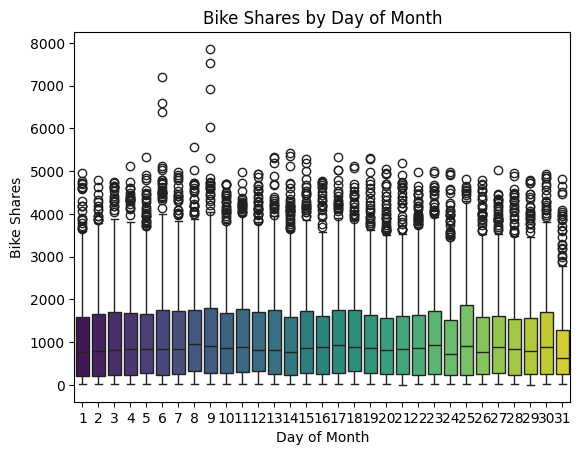

In [15]:
sns.boxplot(data=data, x='day_of_month', y='cnt', palette='viridis')
plt.title("Bike Shares by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Bike Shares")
plt.show()


#**TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON**



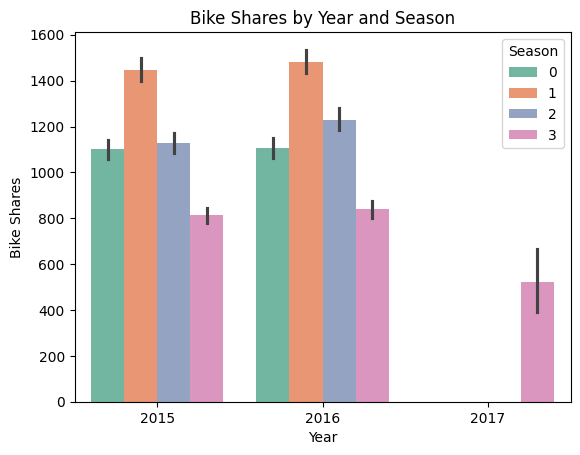

In [16]:
sns.barplot(data=data, x='year', y='cnt', hue='season', palette='Set2')
plt.title("Bike Shares by Year and Season")
plt.xlabel("Year")
plt.ylabel("Bike Shares")
plt.legend(title='Season')
plt.show()


#**TASK 14 - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT**

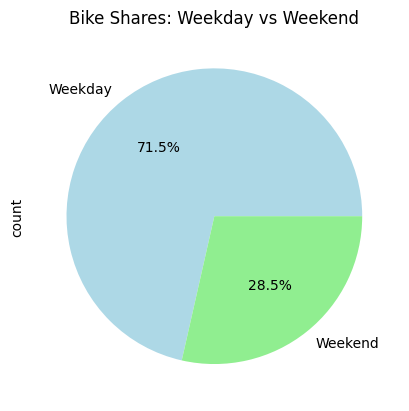

<ipython-input-17-488d53053cd1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='weekday_weekend', y='cnt', palette='pastel')


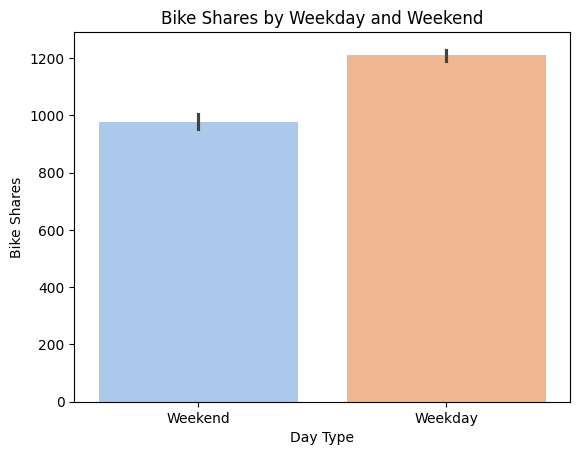

In [17]:
# Pie chart
data['weekday_weekend'] = data['day_of_week'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
data['weekday_weekend'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title("Bike Shares: Weekday vs Weekend")
plt.show()

# Bar plot
sns.barplot(data=data, x='weekday_weekend', y='cnt', palette='pastel')
plt.title("Bike Shares by Weekday and Weekend")
plt.xlabel("Day Type")
plt.ylabel("Bike Shares")
plt.show()


#**TASK 15 - PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON**





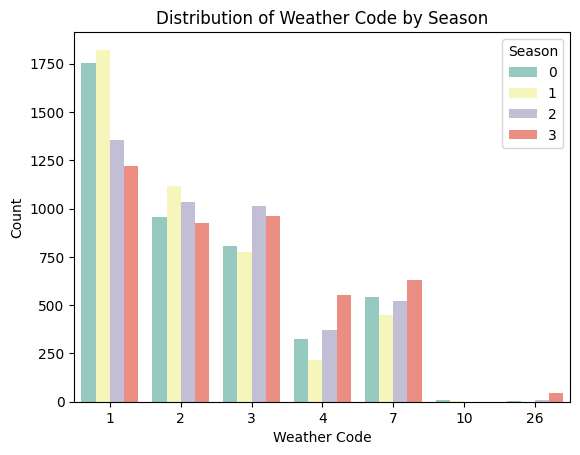

In [18]:
sns.countplot(data=data, x='weather_code', hue='season', palette='Set3')
plt.title("Distribution of Weather Code by Season")
plt.xlabel("Weather Code")
plt.ylabel("Count")
plt.legend(title='Season')
plt.show()
